In [2]:
import allennlp
import torch
import numpy

from allennlp.common import Params
from allennlp.models import Model
from allennlp.data.dataset_readers import DatasetReader
from allennlp.data.iterators import BasicIterator
from allennlp.common import Tqdm

import os
os.chdir('/root')

from clustering_tool.model import DeepClusteringModel
from clustering_tool.modules.encoders import feedforward
from clustering_tool.modules.clusterers import XieClusterer
from clustering_tool.modules.embedders import PcaEmbedder
from data_readers import ReutersReader, NltkReutersReader
#from data_readers import *

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
!ls data_readers

NewsSpaceReader.py    ReutersReader.py	__pycache__
NltkReutersReader.py  __init__.py	fields


In [4]:
def visualize_model(model, generator, num_batches):
    clustered_points = []
    hard_assignments = []

    i = 0
    for batch in generator:
        if i >= num_batches:
            break
        i += 1
    
        output_dict = model.forward(batch['sentence'], batch['label'])
        for h in output_dict['h']:
            clustered_points.append(h.squeeze().detach().numpy())
        for ass in model.decode(output_dict)['cluster']:
            hard_assignments.append(ass.detach().numpy())
            
    print(clustered_points[0].shape)
    pca = PCA(n_components = 2, random_state=678437)
    pca.fit(clustered_points)
    points2d = pca.transform(clustered_points)
    centers = model._clusterer.cluster_centers.detach().numpy()
    centers2d = pca.transform(centers)
    x_min = numpy.amin(points2d[:,0])
    x_max = numpy.amax(points2d[:,0])
    y_min = numpy.amin(points2d[:,1])
    y_max = numpy.amax(points2d[:,1])
    
    fig = plt.figure(figsize=(18, 10))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(points2d[:,0], points2d[:,1], c = hard_assignments, s = 9)
    for i,j in centers2d:
        if i < x_min or i > x_max:
            continue
        if j < y_min or j > y_max:
            continue
        
        ax.scatter(i,j,s=40,c='red',marker='+')
    
    plt.colorbar(scatter)

In [5]:
def visualize(weights_file=None, model_dir = None, num_batches=10):
    
    params = Params.from_file(os.path.join(model_dir, 'config.json'))
    if model_dir is None:
        model_dir = os.path.join('models', model_name)
    model = Model.load(params, model_dir, weights_file=os.path.join(model_dir, weights_file) if weights_file else None)
    
    reader_params = params.pop('dataset_reader')
    reader_type = reader_params.pop('type')
    reader = DatasetReader.by_name(reader_type).from_params(reader_params)
    
    data_iterator = BasicIterator()
    data_iterator.vocab = model.vocab

    instances = reader.read('test')
    iterator = data_iterator(instances, num_epochs=1, shuffle=False)
    
    visualize_model(model, iterator, num_batches)

14439it [00:06, 2094.32it/s]


(10,)


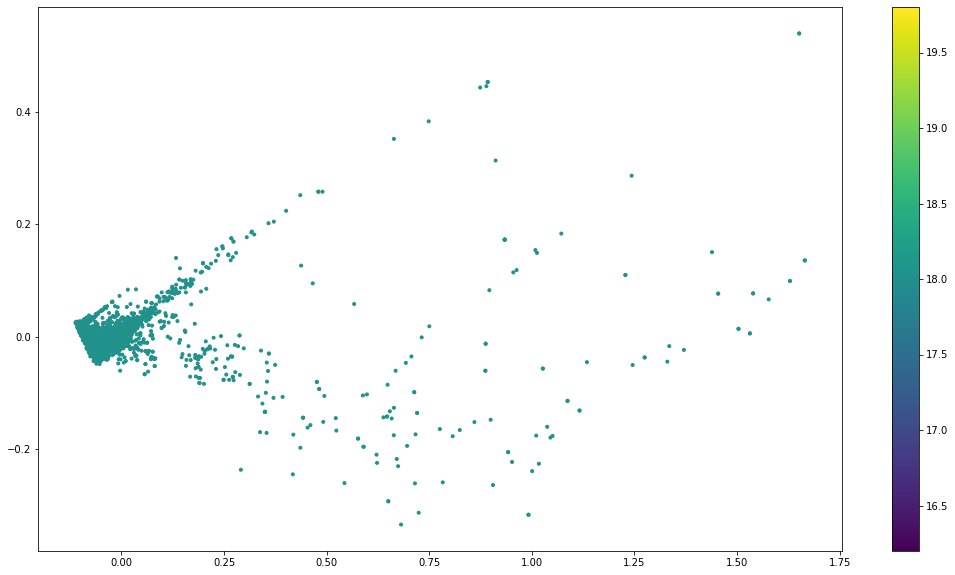

In [6]:
model_dir = 'models/nltk_reuters_xie_not_fixed_centers'
visualize('model_state_epoch_0.th', model_dir=model_dir, num_batches=100)

14439it [00:04, 3017.93it/s]


(10,)


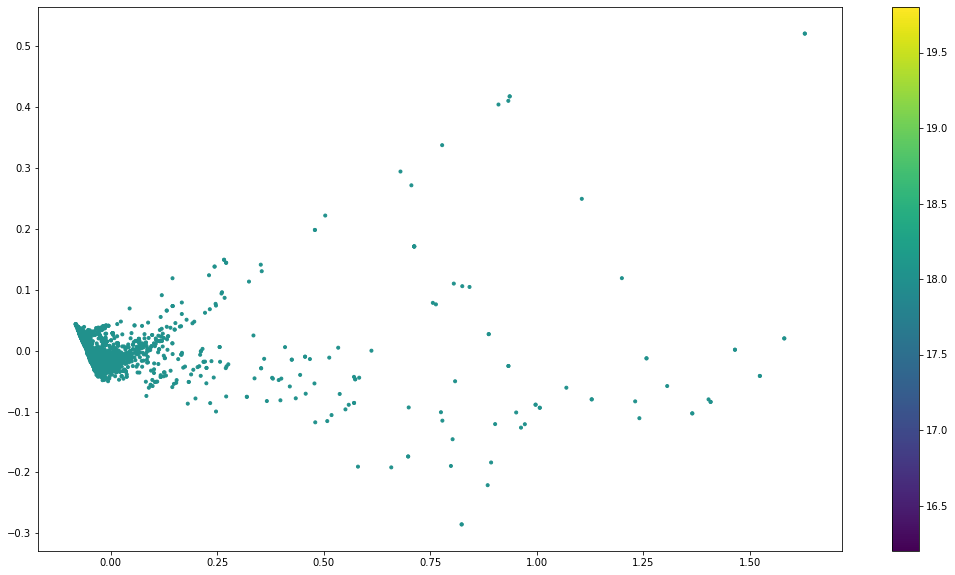

In [7]:
visualize('model_state_epoch_1.th', model_dir=model_dir, num_batches=100)

14439it [00:04, 3071.32it/s]


(10,)


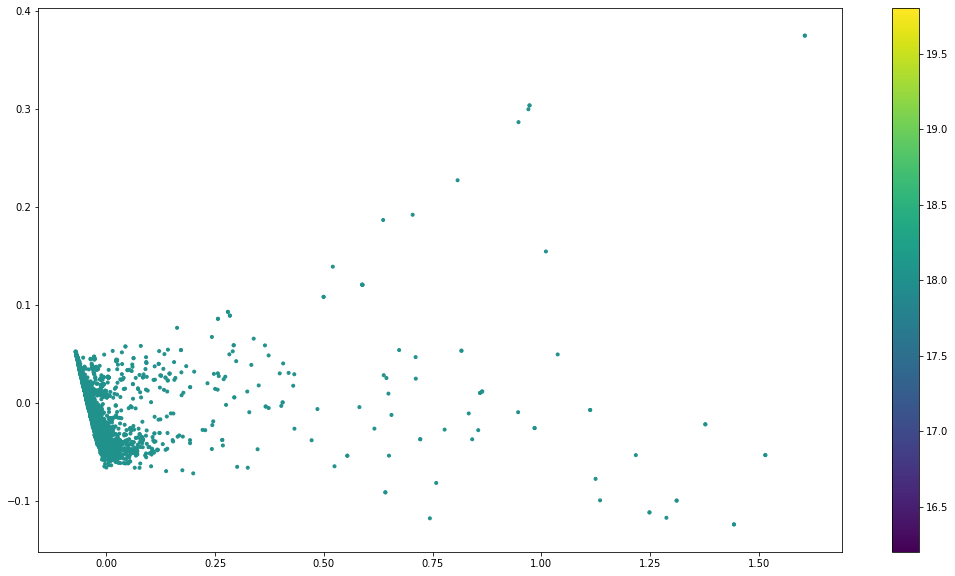

In [8]:
visualize('model_state_epoch_4.th', model_dir=model_dir, num_batches=100)

14439it [00:05, 2565.23it/s]


(10,)


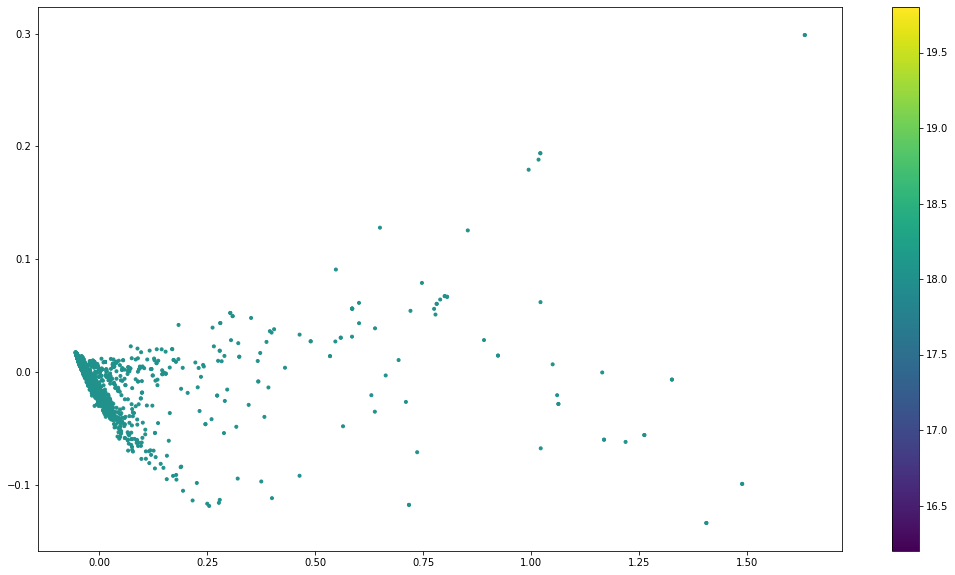

In [9]:
visualize('model_state_epoch_9.th', model_dir=model_dir, num_batches= 100)

14439it [00:05, 2554.41it/s]


(10,)


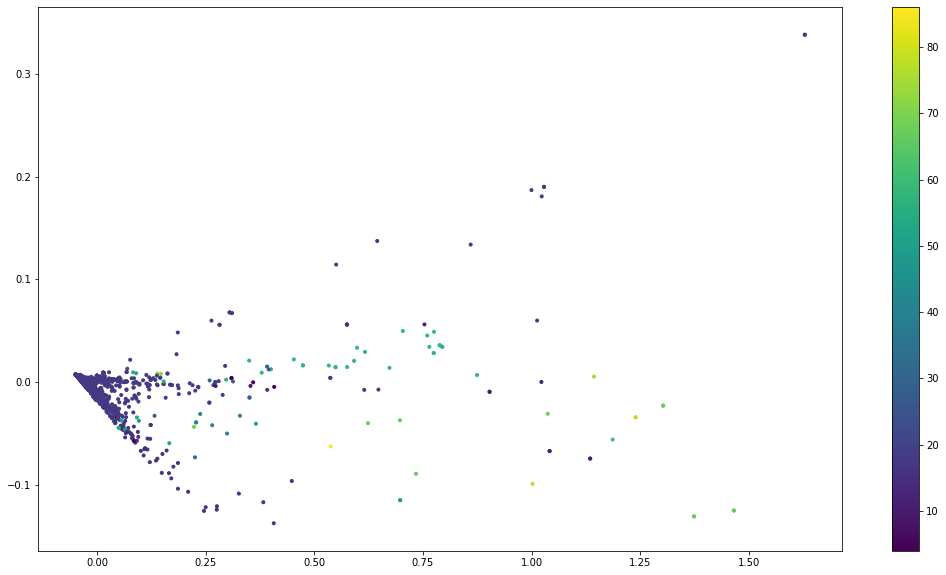

In [10]:
visualize('model_state_epoch_15.th', model_dir=model_dir, num_batches= 100)

14439it [00:05, 2479.68it/s]


(10,)


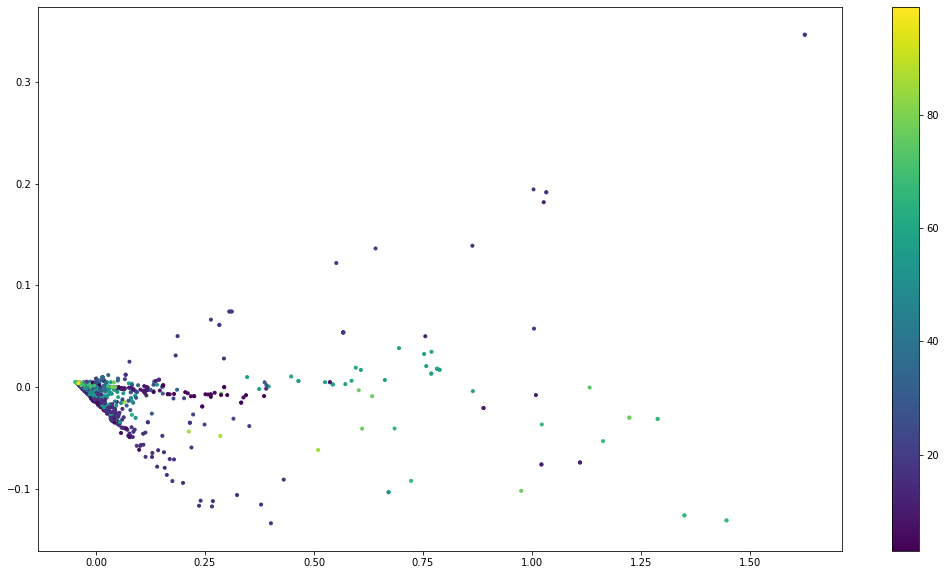

In [11]:
visualize('model_state_epoch_28.th', model_dir=model_dir, num_batches= 100)

14439it [00:05, 2549.64it/s]


(10,)


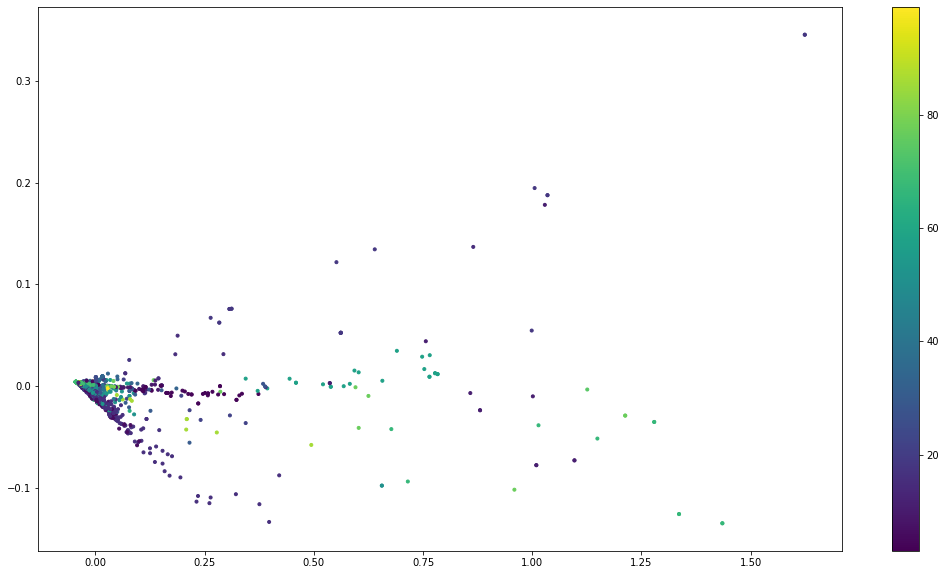

In [12]:
visualize('model_state_epoch_35.th', model_dir=model_dir, num_batches= 100)

14439it [00:05, 2455.55it/s]


(10,)


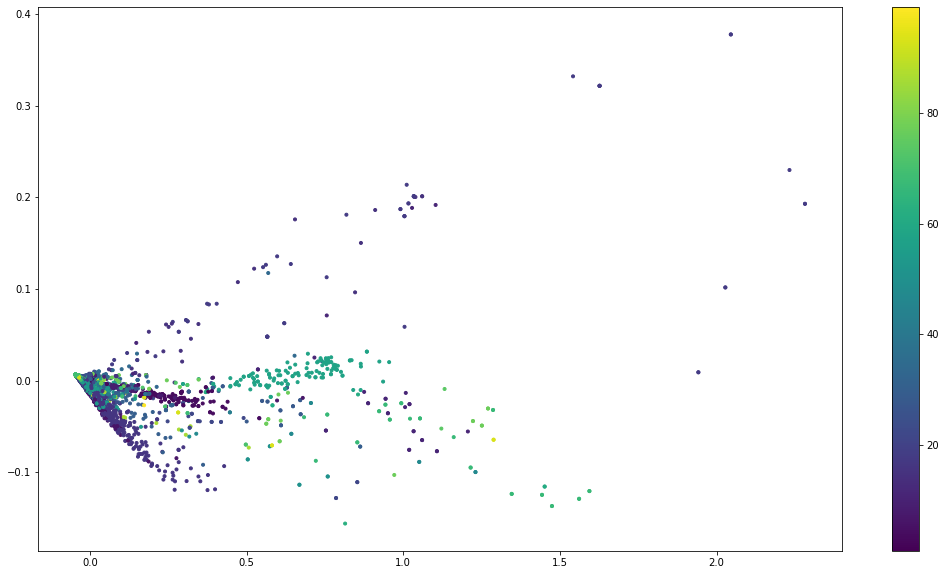

In [14]:
visualize(model_dir=model_dir, num_batches=1000)

In [15]:
model_dir = 'models/reuters_xie_fixed_centers_no_embedder'
visualize('model_state_epoch_0.th', model_dir=model_dir, num_batches=100)

RuntimeError: Tensor.__contains__ only supports Tensor or scalar, but you passed in a <class 'str'>.

In [ ]:
visualize('model_state_epoch_1.th', model_dir=model_dir, num_batches=100)

In [ ]:
visualize('model_state_epoch_5.th', model_dir=model_dir, num_batches=100)

In [ ]:
visualize('model_state_epoch_10.th', model_dir=model_dir, num_batches=100)

In [ ]:
visualize('model_state_epoch_20.th', model_dir=model_dir, num_batches=100)

In [ ]:
visualize('model_state_epoch_30.th', model_dir=model_dir, num_batches=100)

In [16]:
visualize(model_dir=model_dir, num_batches=100)

RuntimeError: Tensor.__contains__ only supports Tensor or scalar, but you passed in a <class 'str'>.